# Targets

> Joseph P. Vantassel, The University of Texas at Austin

This notebook is intended as a gallery of the functionality available with `swipp` Target objects.

## Table of Contents

- [Constructing](#Constructing)
    - [Target()](#Target())
    - [from_csv()](#from_csv())
    - [from_target()](#from_target())
- [Manipulating](#Manipulating)
    - [resample()](#resample())
        - [log-wavelength](#log-wavelength)
        - [log-frequency](#log-frequency)
    - [setcov()](#setcov())
    - [setmincov()](#setmincov())
- [Writting](#Writting)
    - [to_txt_dinver()](#to_txt_dinver())
    - [to_txt_swipp()](#to_txt_swipp())
    - [to_target()](#to_target())

In [1]:
import swprepost
import numpy as np
import matplotlib.pyplot as plt

## Constructing

### Target()

Standard method for initializing a Target object.

[Back to Top](#Targets)

In [2]:
# frequency and velocity must be iterable, lists and ndarrays are convenient.
# velstd can be an iterable -> frequency specific standard deviation.
frq = [1., 3., 5., 7., 10.]
vel = [200., 180., 150., 110., 100.]
std = [10., 9., 8., 6., 5.]
tar = swprepost.Target(frequency=frq, velocity=vel, velstd=std)
print(tar)

# velstd can also be a float -> float acts as COV.
tar = swprepost.Target(frequency=frq, velocity=vel, velstd=0.05)
print(tar)

# velstd can also be None -> no standard deviation.
tar = swprepost.Target(frequency=frq, velocity=vel, velstd=None)
print(tar)

Target with 5 frequency/wavelength points
Target with 5 frequency/wavelength points
Target with 5 frequency/wavelength points


### from_csv()

Can construct Target object from a `.csv`.

[Back to Top](#Targets)

In [3]:
# Create target from csv with standard deviation.
tar = swprepost.Target.from_csv("inputs/from_tar_with_velstd.csv")
print(tar)

# Create target from csv without standard deviation.
tar = swprepost.Target.from_csv("inputs/from_tar_without_velstd.csv")
print(tar)

Target with 3 frequency/wavelength points
Target with 3 frequency/wavelength points


### from_target()

Can construct Target from an existing `.target` file.

_Note: This functionality is still experimental and may not work in all cases._

[Back to Top](#Targets)

In [4]:
# Using v2
tar = swprepost.Target.from_target("inputs/from_tar_v2", version="2")
print(tar)

# Using v3
tar = swprepost.Target.from_target("inputs/from_tar_v3", version="3")
print(tar)

Target with 4 frequency/wavelength points
Target with 4 frequency/wavelength points


## Manipulating

### resample()

#### log-wavelength

[Back to Top](#Targets)

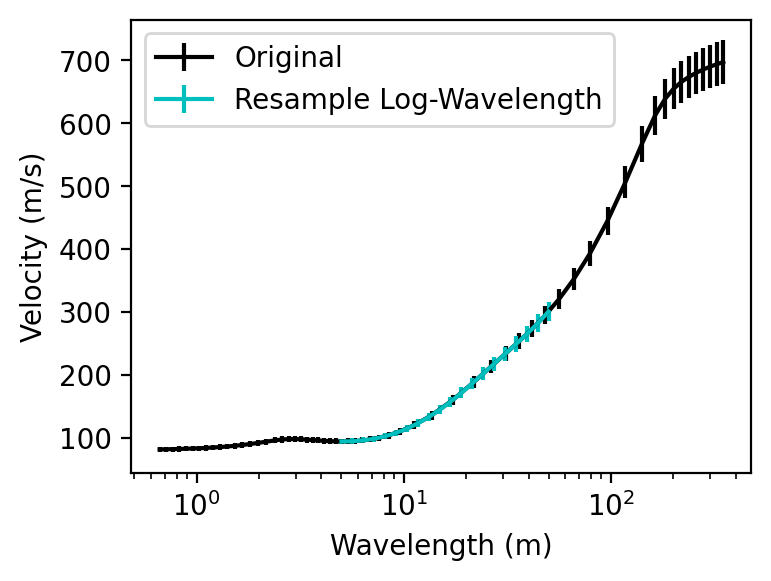

In [5]:
# Perform resampling in log-wavelength
tar = swprepost.Target.from_target("inputs/from_tar_complex")
new_tar = tar.easy_resample(pmin=5, pmax=50, pn=20, res_type="log", domain="wavelength", inplace=False)

# Plot
fig, ax = plt.subplots(figsize=(4,3), dpi=200)
ax.errorbar(tar.wavelength, tar.velocity, yerr=tar.velstd, color="k", label="Original")
ax.set_xscale("log"); ax.set_xlabel("Wavelength (m)"), ax.set_ylabel("Velocity (m/s)")
ax.errorbar(new_tar.wavelength, new_tar.velocity, yerr=new_tar.velstd, color="c", label="Resample Log-Wavelength")
ax.legend()
plt.show()

#### log-frequency

[Back to Top](#Targets)

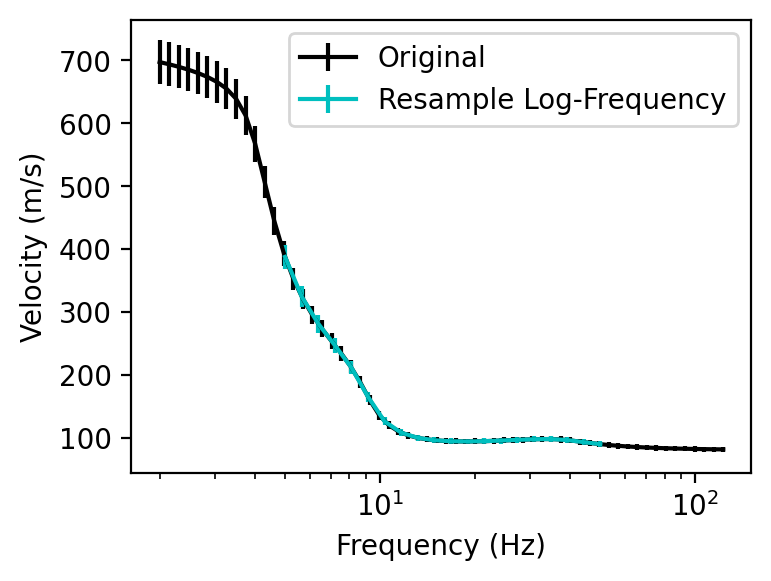

In [6]:
# Perform resampling in log-frequency
tar = swprepost.Target.from_target("inputs/from_tar_complex")
new_tar = tar.easy_resample(pmin=5, pmax=50, pn=20, res_type="log", domain="frequency", inplace=False)

# Plot
fig, ax = plt.subplots(figsize=(4,3), dpi=200)
ax.errorbar(tar.frequency, tar.velocity, yerr=tar.velstd, color="k", label="Original")
ax.set_xscale("log"); ax.set_xlabel("Frequency (Hz)"), ax.set_ylabel("Velocity (m/s)")
ax.errorbar(new_tar.frequency, new_tar.velocity, yerr=new_tar.velstd, color="c", label="Resample Log-Frequency")
ax.legend()
plt.show()

### setcov()

Set all COV values to the selected value.

[Back to Top](#Targets)

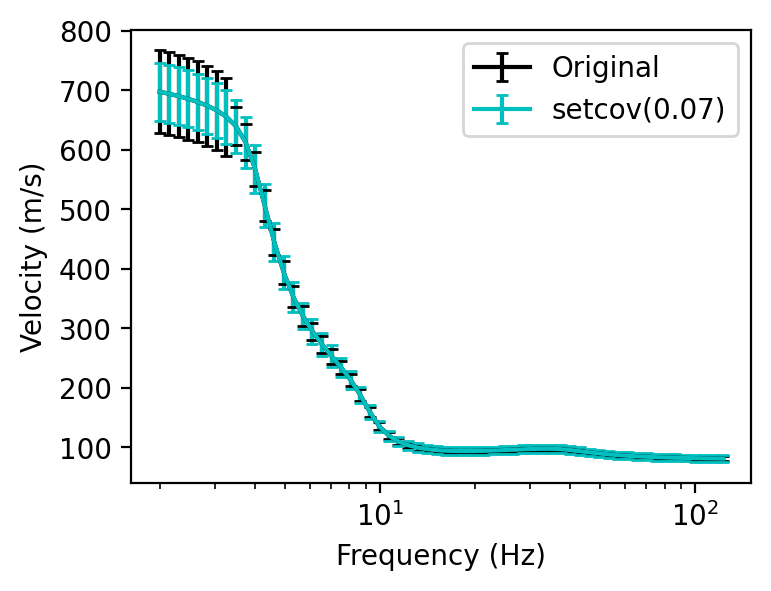

In [7]:
# Create original and plot
tar = swprepost.Target.from_target("inputs/from_tar_complex")
tar.velstd[0:8] = tar.velocity[0:8]*0.10
fig, ax = plt.subplots(figsize=(4,3), dpi=200)
ax.errorbar(tar.frequency, tar.velocity, yerr=tar.velstd, color="k", label="Original", capsize=2)

# Set coefficient of variation (COV) everywhere to 0.07 and plot.
tar.setcov(0.07)
ax.set_xscale("log"); ax.set_xlabel("Frequency (Hz)"), ax.set_ylabel("Velocity (m/s)")
ax.errorbar(tar.frequency, tar.velocity, yerr=tar.velstd, color="c", label="setcov(0.07)", capsize=2)
ax.legend()
plt.show()

### setmincov()

Only increase the COV values below some minimum.

[Back to Top](#Targets)

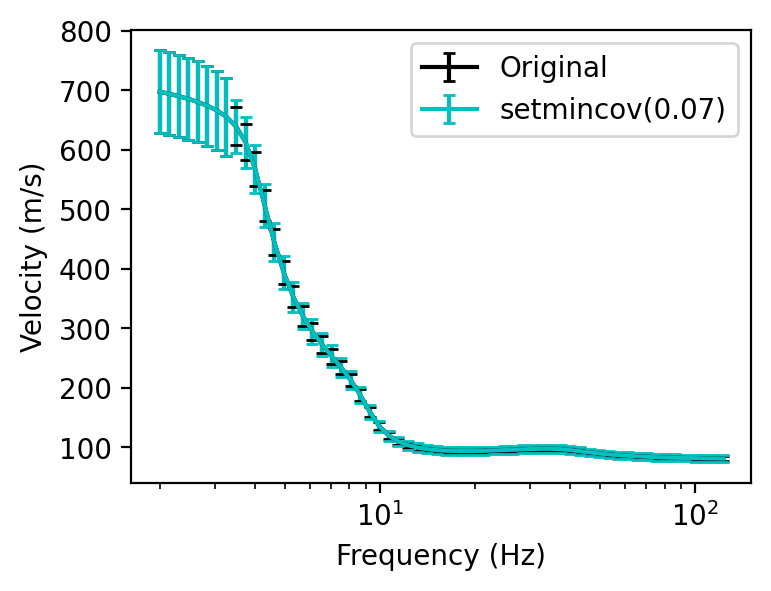

In [8]:
# Create original and plot
tar = swprepost.Target.from_target("inputs/from_tar_complex")
tar.velstd[0:8] = tar.velocity[0:8]*0.10
fig, ax = plt.subplots(figsize=(4,3), dpi=200)
ax.errorbar(tar.frequency, tar.velocity, yerr=tar.velstd, color="k", label="Original", capsize=2)

# # Set a minimum coefficient of variation (COV) to 0.05 and plot.
tar.setmincov(0.07)
ax.set_xscale("log"); ax.set_xlabel("Frequency (Hz)"), ax.set_ylabel("Velocity (m/s)")
ax.errorbar(tar.frequency, tar.velocity, yerr=tar.velstd, color="c", capsize=2, label="setmincov(0.07)")
ax.legend()
plt.show()

## Writting

### to_txt_dinver()

Write the data to a `.txt` file which is readily accepted into Dinver's pre-processor interface.

[Back to Top](#Targets)

In [9]:
frq = [1., 3., 5., 7., 10.]
vel = [200., 180., 150., 110., 100.]
std = [10., 9., 8., 6., 5.]
tar = swprepost.Target(frequency=frq, velocity=vel, velstd=std)

print("v3")
tar.to_txt_dinver("to_txt_dinver_v3.txt", version="3")
with open("to_txt_dinver_v3.txt", "r") as f:
    lines = f.read()
print("Frequency\tSlowness\tLogSlowStd")
print(lines)

print("v2")
tar.to_txt_dinver("to_txt_dinver_v2.txt", version="2")
with open("to_txt_dinver_v2.txt", "r") as f:
    lines = f.read()
print("Frequency\tSlowness\tSlownessStd")
print(lines)

v3
Frequency	Slowness	LogSlowStd
1.0	0.005	1.0513157894736842
3.0	0.005555555555555556	1.0513157894736842
5.0	0.006666666666666667	1.0548356807511738
7.0	0.00909090909090909	1.056118881118881
10.0	0.01	1.0513157894736842

v2
Frequency	Slowness	SlownessStd
1.0	0.005	0.0002506265664160398
3.0	0.005555555555555556	0.000278473962684489
5.0	0.006666666666666667	0.00035656979853806395
7.0	0.00909090909090909	0.0004973474801061011
10.0	0.01	0.0005012531328320797



### to_csv()

Write the data to a `.txt` file which is readily accepted by `swprepost`'s `from_csv` constructor.

[Back to Top](#Targets)

In [10]:
frq = [1., 3., 5., 7., 10.]
vel = [200., 180., 150., 110., 100.]
std = [10., 9., 8., 6., 5.]
tar = swprepost.Target(frequency=frq, velocity=vel, velstd=std)
print(f"Write: {tar}")
tar.to_csv("to_txt_swipp.csv")

new_tar = swprepost.Target.from_csv("to_txt_swipp.csv")
print(f"Read:  {new_tar}")

Write: Target with 5 frequency/wavelength points
Read:  Target with 5 frequency/wavelength points


### to_target()

Write the data to a `.target` file which can be imported into Dinver.

[Back to Top](#Targets)

In [11]:
frq = [1., 3., 5., 7., 10.]
vel = [200., 180., 150., 110., 100.]
std = [10., 9., 8., 6., 5.]
tar = swprepost.Target(frequency=frq, velocity=vel, velstd=std)
print("v3")
tar.to_target("to_target_v3", version="3")
print(f"Write: {tar}")
new_tar = swprepost.Target.from_target("to_target_v3", version="3")
print(f"Read:  {new_tar}")

print()
print("v2")
tar.to_target("to_target_v2", version="2")
print(f"Write: {tar}")
new_tar = swprepost.Target.from_target("to_target_v3", version="3")
print(f"Read:  {new_tar}")

v3
Write: Target with 5 frequency/wavelength points
Read:  Target with 5 frequency/wavelength points

v2
Write: Target with 5 frequency/wavelength points
Read:  Target with 5 frequency/wavelength points
